Reference
---
- [Deep Learning Book, Ian Goodfellow - Ch5 Machine Learning Basics](http://www.deeplearningbook.org/)
- [Pattern Recognition and Machine Learning, Bishop](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)
- [자습해도 모르겠던 딥러닝, 머리속에 인스톨 시켜드립니다, 하용호](https://www.slideshare.net/yongho/ss-79607172)
- [Andrew Ng holehouse Deep Learning Lecture Note](http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr.html)
- [Andrew Ng UFLDL Tutorial](http://ufldl.stanford.edu/tutorial/supervised/LinearRegression/)
- [PyTorch github](https://github.com/pytorch/examples)
- [Choosing a Machine Learning Framework in 2018](https://agi.io/2018/02/09/survey-machine-learning-frameworks/)
- [기계학습(Machine Learning) 입문하기, 엄태웅](https://www.youtube.com/watch?v=j3za7nv7RfI")

Linear Regression (PyTorch Tutorial)
---
<img src="https://cdn-images-1.medium.com/max/1600/1*eLfDr8eXnYKY-VELQXmnSg.png" alt="Drawing" style="width: 500px;"/>

\begin{align} J(\theta) = \sum_{i=1} (h_\theta(x_i)-y_i)^2 \end{align}

\begin{align} h_\theta(x_i) = \theta^Tx_i + b \end{align}

\begin{align} \theta^* = \arg\min_\theta J(\theta) \end{align}


### Gradient Descent

<img src="http://www.stronglyconvex.com/assets/img/gradient_descent/animation.gif" alt="Drawing" style="width: 600px;"/>

\begin{align} \theta^\prime = \theta - \eta \nabla J(\theta) \end{align}




### Stochastic Gradient Descent

<img src="https://image.slidesharecdn.com/random-170910154045/95/-40-638.jpg?cb=1505089848" alt="Drawing" style="width: 700px;"/>

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

x_train = [[1.0], [2.0], [3.0], [4.0], [5.0]]
y_correct = [[2.0], [4.0], [6.0], [7.0], [9.0]]

class LinearRegressionModel(torch.nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

epoch 0, loss 43.066192627
epoch 1, loss 25.1672706604
epoch 2, loss 14.7363538742
epoch 3, loss 8.65742969513
epoch 4, loss 5.11463165283
epoch 5, loss 3.04976272583
epoch 6, loss 1.84616184235
epoch 7, loss 1.14446663857
epoch 8, loss 0.735258996487
epoch 9, loss 0.496500879526
epoch 10, loss 0.3570741117
epoch 11, loss 0.275534808636
epoch 12, loss 0.227731660008
epoch 13, loss 0.199589818716
epoch 14, loss 0.182907655835
epoch 15, loss 0.172905549407
epoch 16, loss 0.166798129678
epoch 17, loss 0.162962347269
epoch 18, loss 0.160452052951
epoch 19, loss 0.15871617198


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


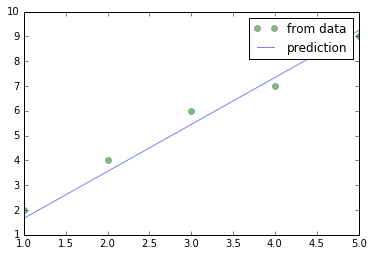

OrderedDict([('linear.weight', tensor([[1.8935]])), ('linear.bias', tensor([-0.2306]))])


In [2]:
# Define model
model = LinearRegressionModel(1, 1)

criterion = torch.nn.MSELoss() # Mean Squared Loss
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) 

epochs = 20
for epoch in range(epochs):
    inputs = torch.autograd.Variable(torch.Tensor(x_train))
    labels = torch.autograd.Variable(torch.Tensor(y_correct))

    #clear grads as discussed in prev post
    optimiser.zero_grad()

    #forward to get predicted values
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))

predicted = model.forward(torch.autograd.Variable(torch.Tensor(x_train))).data.numpy()

plt.plot(x_train, y_correct, 'go', label = 'from data', alpha = .5)
plt.plot(x_train, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(model.state_dict())

Classification with neural network(PyTorch Tutorial)
---
적은 데이터의 경우 사람이 직접 데이터 개형을 본 이후 구분짓는 함수 등을 정의한 이후 학습을 시키는 것이 가능했으나, 너무나 많고 복잡한 개형의 데이터들의 경우 사람이 직접 구분짓는 함수를 정의할 수 없었습니다. 이를 해결하기 위해서 나온 것이 바로 Neural Network입니다.



### Neural Network
<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/Single-Perceptron.png?x31195" alt="Drawing" style="width: 500px;"/>


\begin{align} y = \sigma(w^Tx) \end{align}

\begin{align} J(\theta) = \sum_{i=1} (\sigma(w^Tx_i)-y_i)^2 \end{align}



아래의 예제는 neural network가 어떻게 돌아가는 지 간단하게 알아볼 수 있는 예제입니다. 물론 간단히 알아보기 위함이기 때문에 Neural Network를 써야할 정도로 데이터 개수가 많거나 비선형적인 예제는 아니지만 개념만 알고 가기 위해 살펴봅시다.




In [4]:
import torch
print(torch.__version__)

0.4.1


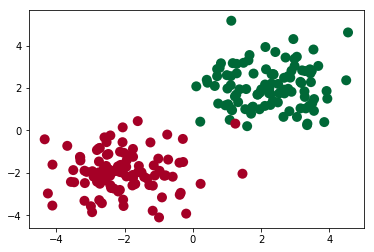

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


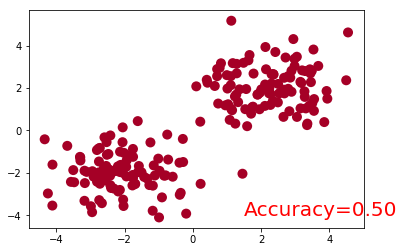

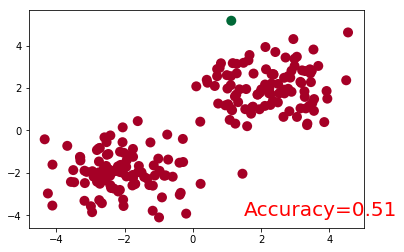

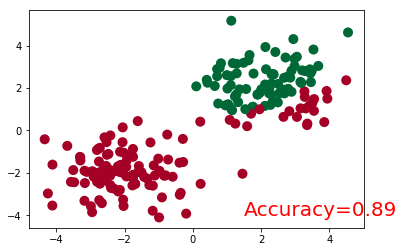

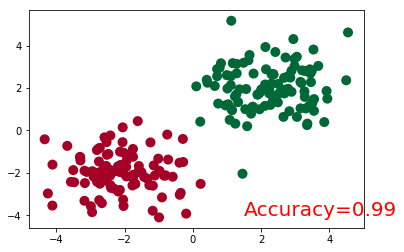

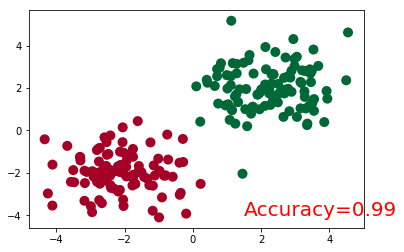

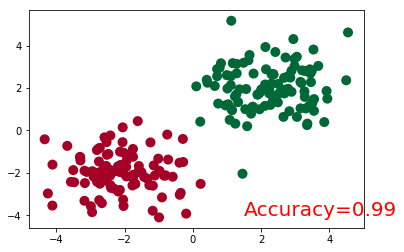

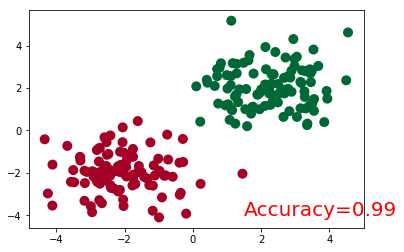

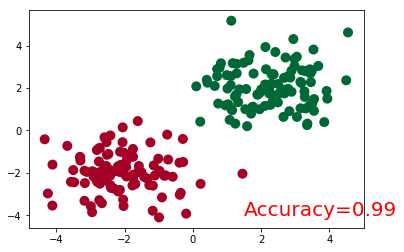

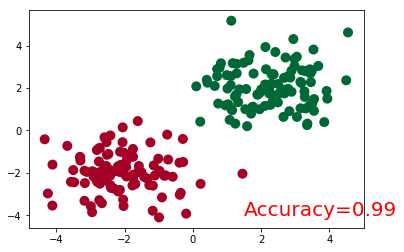

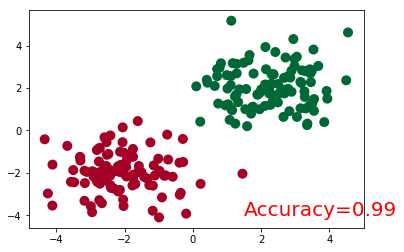

In [5]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# make fake data
n_data = torch.ones(100, 2)
# x data (tensor), shape=(100, 2)
x0 = torch.normal(2*n_data, 1)
x1 = torch.normal(-2*n_data, 1)
# y data (tensor), shape=(100, 2)
y0 = torch.cat((torch.zeros(100,1),torch.ones(100,1)),1)
y1 = torch.cat((torch.ones(100,1),torch.zeros(100,1)),1)

x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)    # shape (200, 2) LongTensor = 64-bit integer

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy()[:,1], s=100, lw=0, cmap='RdYlGn')
plt.show()

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.softmax(self.hidden(x),1)      # activation function for hidden layer
        x = self.out(x)
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
# loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted
loss_func = torch.nn.MSELoss()  # the target label is NOT an one-hotted

plt.ion()   # something about plotting

for t in range(500):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 50 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_one_hot = torch.max(y, 1)[1]
        target_y = target_one_hot.data.numpy().squeeze()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()